### 1. Introduction to Feature Selection 


#### Feature selection
Feature selection or variable selection is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.
#### Advantages of selecting features
There are various advantages of feature selection process. These are as follows:-

1. Improved accuracy
2. Simple models are easier to interpret.
3. Shorter training times
4. Enhanced generalization by reducing Overfitting
5. Easier to implement by software developers
6. Reduced risk of data errors by model use
7. Variable redundancy
8. Bad learning behaviour in high dimensional spaces
#### Feature Selection – Techniques
Feature selection techniques are categorized into 3 typers. These are as follows:-

1. Filter methods
2. Wrapper methods
3. Embedded methods

### Filter Methods
Filter methods consists of various techniques as given below:-

- Basic methods
- Univariate methods
- Information gain
- Fischer score
- Correlation Matrix with Heatmap

### Wrapper Methods
- Wrapper methods consists of the following techniques:-

1. Forward Selection
2. Backward Elimination
3. Exhaustive Feature Selection
4. Recursive Feature Elimination
5. Recursive Feature Elimination with Cross-Validation

### Embedded Methods
- Embedded methods consists of the following techniques:-

1. LASSO
2. RIDGE
3. Tree Importance
- Now, we will discuss these methods in detail.

### 2. Filter Methods 


Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The characteristics of these methods are as follows:-

- These methods rely on the characteristics of the data (feature characteristics)
- They do not use machine learning algorithms.
- These are model agnostic.
- They tend to be less computationally expensive.
- They usually give lower prediction performance than wrapper methods.
- They are very well suited for a quick screen and removal of irrelevant features.

- Filter methods consists of various techniques as given below:-

- 2.1. Basic methods
- 2.2. Univariate feature selection
- 2.3. Information gain
- 2.4. Fischer score
- 2.5. ANOVA F-Value for Feature Selection
- 2.6. Correlation Matrix with Heatmap
Filter methods can be explained with the help of following graphic:
FilterMethods

Image source : AnalyticsVidhya
2.1 Basic methods 


Under basic methods, we remove constant and quasi-constant features.
2.1.1 Remove constant features 
Table of Contents

Constant features are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.

Identifying and removing constant features, is an easy first step towards feature selection and more easily interpretable machine learning models. To identify constant features, we can use the VarianceThreshold function from sklearn.

I will demonstrate how to identify constant features using the Santander Customer Satisfaction dataset from Kaggle.

Source :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [51]:
X_train = pd.read_csv('./files/Santander-Customer-Satisfaction-train.csv', nrows=35000)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
X_test = pd.read_csv('./files/Santander-Customer-Satisfaction-test.csv', nrows=15000)
X_test.tail()

#### Using variance threshold from sklearn

Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [ ]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

In [ ]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

In [ ]:
# alternate way of finding non-constant features
len(X_train.columns[sel.get_support()])

In [ ]:
# print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

- We can see that there are 51 columns / variables that are constant. This means that 51 variables show the same value, just one value, for all the observations of the training set.
- We then use the transform function to reduce the training and testing sets.

In [ ]:
# we can then drop these columns from the train and test sets
X_train = sel.transform(X_train)
X_train


In [ ]:
# X_test = sel.transform(X_test)

In [ ]:
# check the shape of training and test set

X_train.shape, X_test.shape

#### 2.1.2 Remove quasi-constant features ¶


- Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target. But there can be exceptions. So we should be careful when removing these type of features. Identifying and removing quasi-constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.

- To identify quasi-constant features, we can once again use the VarianceThreshold function from sklearn.

- Here I will demonstrate how to identify quasi-constant features using the Santander Customer Satisfaction dataset.

In [60]:
X_train = pd.read_csv('./files/Santander-Customer-Satisfaction-train.csv', nrows=35000)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [61]:
X_test = pd.read_csv('./files/Santander-Customer-Satisfaction-test.csv', nrows=15000)
X_test.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
14995,29822,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
14996,29824,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141868.410000
14997,29825,2,53,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55323.540000
14998,29827,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65211.420000
14999,29833,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59049.300000


In [62]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [63]:
# get_support is a boolean vector that indicates which features 
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

np.int64(264)

In [64]:
# alternative way of doing the above operation:
len(X_train.columns[sel.get_support()])

264

In [65]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

- We can see that 107 columns / variables are almost constant. This means that 107 variables show predominantly one value for ~99% the observations of the training set.

In [66]:
# we can then remove the features from training and test set
X_train = sel.transform(X_train)
# X_test = sel.transform(X_test)

In [67]:
# check the shape of training and test set
X_train.shape, X_test.shape

((35000, 264), (15000, 370))

### 2.2 Univariate selection methods 


- Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

- The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

- There are 4 methods that fall under this category :-

1. SelectKBest
2. SelectPercentile
3. SelectFpr, SelectFdr, or family wise error SelectFwe
4. GenericUnivariateSelection

Here, I will limit the discussion to SelectKBest and SelectPercentile, because these two are most commonly used in practice.

### 2.2.1 SelectKBest 
Table of Contents

This method select features according to the k highest scores.

For instance, we can perform a chi-square test to the samples to retrieve only the two best features from iris dataset as follows:

Source : https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape


(150, 4)

In [72]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [69]:
# select the two best features
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [73]:
X_new[:10,:]    

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

### 2.2.2 SelectPercentile 


Select features according to a percentile of the highest scores.
Source : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [79]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [ ]:
X[:10,:]    
# We can see that only 7 features lie on the top 10 percentile and hence we select them accordingly.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [81]:
# now select features based on top 10 percentile
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

In [82]:
X_new[:10,:]

array([[ 8.,  5.,  8., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1., 16.,  0.,  0.],
       [ 0.,  1.,  8., 16., 16.,  5.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  9.,  0.],
       [ 8.,  5., 16., 15., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0.],
       [ 0.,  0., 15., 13., 16.,  8.,  3.],
       [ 6.,  2., 11.,  0., 16.,  0.,  0.],
       [ 2.,  0.,  4., 16.,  8.,  8.,  1.],
       [ 0.,  0., 13.,  0.,  3.,  4.,  0.]])

### Important information
- These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile:
- For regression tasks: f_regression, mutual_info_regression

- For classification tasks: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

### Feature selection with sparse data
If you use sparse data (i.e. data represented as sparse matrices), chi2, mutual_info_regression, mutual_info_classif will deal with the data without making it dense.
Source : https://scikit-learn.org/stable/modules/feature_selection.html

### Warning
Beware not to use a regression scoring function with a classification problem, you will get useless results.

### 2.3 Information Gain 


- Information gain or mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on the target.
- In terms of wikipedia:
- Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

#### mutual_info_classif
It estimates mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

This function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

It can be used for univariate features selection.

Source :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

#### mutual_info_regression
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

It can be used for univariate features selection

Source :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

#### 2.4 Fisher Score (chi-square implementation)
Table of Contents

It is the chi-square implementation in scikit-learn. It computes chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task. It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [83]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [84]:
# Load Data
# load iris data
iris = load_iris()

# create features and target
X = iris.data
y = iris.target

# convert to categorical data by converting data to integers
X = X.astype(int)

In [85]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [86]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


### 2.5 ANOVA F-value For Feature Selection ¶
Table of Contents

- Compute the ANOVA F-value for the provided sample.

- If the features are categorical, we will calculate a chi-square statistic between each feature and the target vector. However, if the features are quantitative, we will compute the ANOVA F-value between each feature and the target vector.

- The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

In [87]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [88]:
# Load iris data
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [89]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [ ]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
# We can see that the above code helps us to select the 2 best features based on ANOVA F-Value.

Original number of features: 4
Reduced number of features: 2


### 2.6 Correlation-Matrix with Heatmap 
Table of Contents

- Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

- Good variables are highly correlated with the target.

- Correlated predictor variables provide redundant information.

- Variables should be correlated with the target but uncorrelated among themselves.

- Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis:

    - "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".


- In this section, I will demonstrate how to select features based on correlation between two features. We can find features that are correlated with each other. By identifying these features, we can then decide which features we want to keep, and which ones we want to remove.

- Using Pearson correlation our returned coefficient values will vary between -1 and 1.

- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.

- If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).

- If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

- In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [96]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [97]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [98]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


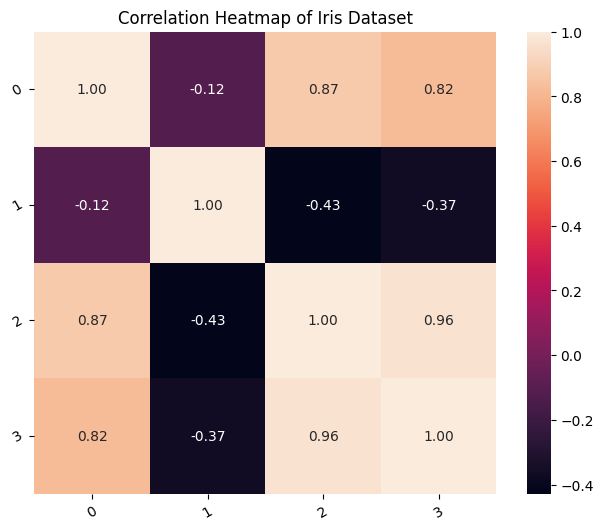

In [99]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()  

In [100]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper  

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [101]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [102]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)

       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]
